In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams ['font.sans-serif']= ['SimHei'] # 用来设置字体样式以正常显示中文标签
plt.rcParams ['axes.unicode_minus']=False # 默认是使用Unicode负号，设置正常显示字符，如正常显示负号
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LassoCV
from GM11 import GM11
from sklearn.svm import LinearSVR
from sklearn.metrics import explained_variance_score,mean_absolute_error,median_absolute_error, r2_score

In [2]:
data=pd.read_csv('data.csv')
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,3831732,181.54,448.19,7571.00,6212.70,6370241,525.71,985.31,60.62,65.66,120.0,1.029,5321,64.87
1,3913824,214.63,549.97,9038.16,7601.73,6467115,618.25,1259.20,73.46,95.46,113.5,1.051,6529,99.75
2,3928907,239.56,686.44,9905.31,8092.82,6560508,638.94,1468.06,81.16,81.16,108.2,1.064,7008,88.11
3,4282130,261.58,802.59,10444.60,8767.98,6664862,656.58,1678.12,85.72,91.70,102.2,1.092,7694,106.07
4,4453911,283.14,904.57,11255.70,9422.33,6741400,758.83,1893.52,88.88,114.61,97.7,1.200,8027,137.32


## pearson相关系数矩阵

In [3]:
pearson=np.round(data.corr(method='pearson'),2)
pearson

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
x1,1.00,0.95,0.95,0.97,0.97,0.99,0.95,0.97,0.98,0.98,-0.29,0.94,0.96,0.94
x2,0.95,1.00,1.00,0.99,0.99,0.92,0.99,0.99,0.98,0.98,-0.13,0.89,1.00,0.98
x3,0.95,1.00,1.00,0.99,0.99,0.92,1.00,0.99,0.98,0.99,-0.15,0.89,1.00,0.99
x4,0.97,0.99,0.99,1.00,1.00,0.95,0.99,1.00,0.99,1.00,-0.19,0.91,1.00,0.99
x5,0.97,0.99,0.99,1.00,1.00,0.95,0.99,1.00,0.99,1.00,-0.18,0.90,0.99,0.99
x6,0.99,0.92,0.92,0.95,0.95,1.00,0.93,0.95,0.97,0.96,-0.34,0.95,0.94,0.91
x7,0.95,0.99,1.00,0.99,0.99,0.93,1.00,0.99,0.98,0.99,-0.15,0.89,1.00,0.99
x8,0.97,0.99,0.99,1.00,1.00,0.95,0.99,1.00,0.99,1.00,-0.15,0.90,1.00,0.99
x9,0.98,0.98,0.98,0.99,0.99,0.97,0.98,0.99,1.00,0.99,-0.23,0.91,0.99,0.98
x10,0.98,0.98,0.99,1.00,1.00,0.96,0.99,1.00,0.99,1.00,-0.17,0.90,0.99,0.99


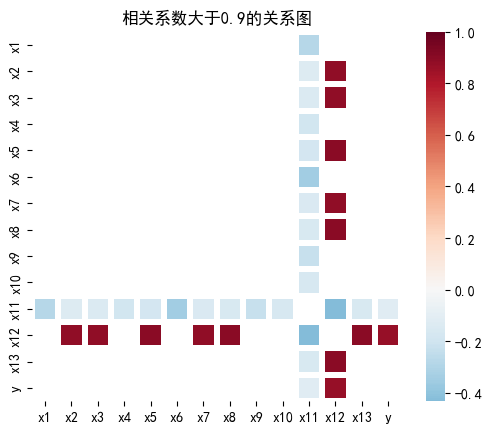

In [4]:
pearson_plt=sns.heatmap(data.corr(),
                       vmax=1,   #颜色条最大值为1
                       cmap='RdBu_r',#红蓝反向颜色映射
                       square=True,#每个单元格的形状为正方形
                       center=0,   #设置颜色条的中间值为0
                       mask=data.corr()>0.9,#隐藏相关系数大于0.9的单元格
                       linewidths=3)#热力图每个单元格之间的线条宽度
pearson_plt.set_title('相关系数大于0.9的关系图')
plt.show()

## lasso回归选取预测的关键特征

In [5]:

X_train=data.iloc[:,0:13]
y=data.iloc[:,-1] #因变量

In [6]:
## 高度相关，多重线性,用lasso模型
#选择lasso模型合适的lambda参数
alpha=np.arange(0,1001,10)
model_lasso=LassoCV(alphas=alpha,cv=3).fit(X_train,y)

In [7]:
# 模型所选择的的最优正则化参数alpha
print(model_lasso.coef_)

[-1.76147790e-04 -0.00000000e+00  1.24143041e-01 -1.03120575e-02
  6.53999569e-02  1.15234764e-04  3.17411469e-01  3.49002210e-02
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.02991430e-02]


In [8]:
#提取系数不为0的特征
mask=model_lasso.coef_!=0
new_reg_data=data.loc[:,X_train.loc[:,mask].columns]
new_reg_data.shape

(20, 8)

# 灰色预测GM(1,1)预测各自变量值

In [9]:
new_reg_data.index=range(1994,2014)
#添加需要预测的两行，赋值为none
new_reg_data.loc[2014,:]=None
new_reg_data.loc[2015,:]=None


In [10]:
# 循环预测每个变量的2024，2015年的特征值
for i in new_reg_data.columns:
    fGM=GM11(new_reg_data.loc[range(1994,2014),i].values)[0]
    new_reg_data.loc[2014,i]=fGM(len(new_reg_data)-1)  #2014年特征预测结果
    new_reg_data.loc[2015,i]=fGM(len(new_reg_data))    #2015年特征预测结果
    new_reg_data[i]=new_reg_data[i].round(2)

In [11]:
new_reg_data

,x1,x3,x4,x5,x6,x7,x8,x13
1994,3831732.00,448.19,7571.00,6212.70,6370241.00,525.71,985.31,5321.00
1995,3913824.00,549.97,9038.16,7601.73,6467115.00,618.25,1259.20,6529.00
1996,3928907.00,686.44,9905.31,8092.82,6560508.00,638.94,1468.06,7008.00
1997,4282130.00,802.59,10444.60,8767.98,6664862.00,656.58,1678.12,7694.00
1998,4453911.00,904.57,11255.70,9422.33,6741400.00,758.83,1893.52,8027.00
1999,4548852.00,1000.69,12018.52,9751.44,6850024.00,878.26,2139.18,8549.00
2000,4962579.00,1121.13,13966.53,11349.47,7006896.00,923.67,2492.74,9566.00
2001,5029338.00,1248.29,14694.00,11467.35,7125979.00,978.21,2841.65,10473.00
2002,5070216.00,1370.68,13380.47,10671.78,7206229.00,1009.24,3203.96,11469.00
2003,5210706.00,1494.27,15002.59,11570.58,7251888.00,1175.17,3758.62,12360.00


In [12]:
y=list(data['y'].values) #提取财政收入列，合并到新数据框
y.extend([np.nan,np.nan])#2014，2015年的y值设为nan
new_reg_data['y']=y

# 构建支持向量机模型

### 数据标准化

In [13]:
feature=new_reg_data.iloc[:,:-1].columns   #自变量
data_train=new_reg_data.loc[range(1994,2014)] #2014年前的数据建模
data_mean=data_train.mean()
data_std=data_train.std()
data_train=(data_train-data_mean)/data_std #数据标准化
data_train

,x1,x3,x4,x5,x6,x7,x8,x13,y
1994,-1.384721,-1.001807,-1.183344,-1.177868,-1.577670,-1.001532,-1.054057,-1.075938,-0.908018
1995,-1.319682,-0.948774,-1.039547,-1.008469,-1.421759,-0.923420,-0.992899,-0.967199,-0.850768
1996,-1.307732,-0.877665,-0.954558,-0.948579,-1.271451,-0.905956,-0.946262,-0.924082,-0.869873
1997,-1.027884,-0.817144,-0.901702,-0.866240,-1.103501,-0.891067,-0.899357,-0.862331,-0.840394
1998,-0.891787,-0.764006,-0.822206,-0.786439,-0.980320,-0.804759,-0.851259,-0.832356,-0.789102
1999,-0.816568,-0.713922,-0.747442,-0.746302,-0.805498,-0.703950,-0.796405,-0.785368,-0.705689
2000,-0.488784,-0.651165,-0.556517,-0.551415,-0.553025,-0.665620,-0.717457,-0.693822,-0.653543
2001,-0.435893,-0.584907,-0.485218,-0.537039,-0.361370,-0.619583,-0.639547,-0.612178,-0.568193
2002,-0.403507,-0.521135,-0.613957,-0.634063,-0.232215,-0.593391,-0.558646,-0.522522,-0.572805
2003,-0.292201,-0.456737,-0.454973,-0.524450,-0.158730,-0.453332,-0.434793,-0.442319,-0.521184


In [14]:
x_train=data_train[feature].values   #特征数据
y_train=data_train['y'].values    #标签数据

## 模型训练

In [15]:
linearsvr=LinearSVR()
SVRmodel=linearsvr.fit(x_train,y_train)

In [16]:
x=((new_reg_data[feature]-data_mean[feature])/data_std[feature]).values
new_reg_data['y_pre']=linearsvr.predict(x)*data_std['y']+data_mean['y']
print('真实值与预测值分别为：\n',new_reg_data[['y','y_pre']])

真实值与预测值分别为：
             y        y_pre
1994    64.87    36.884826
1995    99.75    83.633816
1996    88.11    94.716261
1997   106.07   106.414075
1998   137.32   150.855895
1999   188.14   187.880008
2000   219.91   219.437160
2001   271.91   230.446346
2002   269.10   219.731178
2003   300.55   300.550000
2004   338.45   383.582094
2005   408.86   463.352399
2006   476.72   555.066608
2007   838.99   691.671653
2008   843.14   843.590152
2009  1107.67  1087.701804
2010  1399.16  1379.176286
2011  1535.14  1537.678630
2012  1579.68  1740.732742
2013  2088.14  2087.200828
2014      NaN  2189.133532
2015      NaN  2540.409531


# 结果可视化

<function matplotlib.pyplot.show(close=None, block=None)>

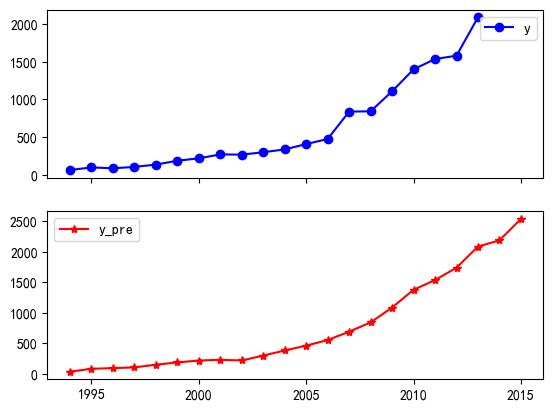

In [17]:
new_reg_data[['y','y_pre']].plot(subplots=True,style=['b-o','r-*'])
plt.show

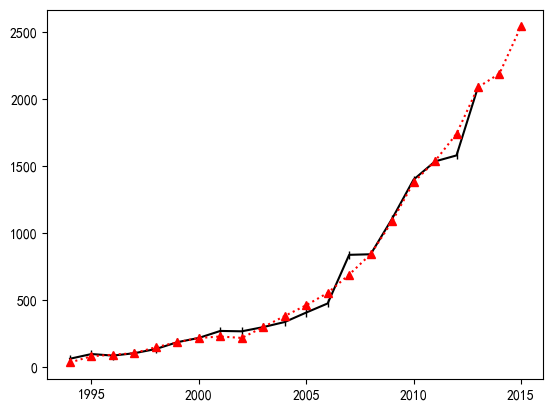

In [18]:
# X=np.linspace(1994,2015,1)

fig=plt.figure()
# plt.title('')
plt.plot(new_reg_data.index,new_reg_data[['y']],'k|-')
plt.plot(new_reg_data.index,new_reg_data[['y_pre']],'r^:')

plt.show()

In [19]:
print('默认评估值：',linearsvr.score(x_train,y_train))
print('R方：',r2_score(new_reg_data['y'][:-2],new_reg_data['y_pre'][:-2]))
print('平均值绝对误差：',mean_absolute_error(new_reg_data['y'][:-2],new_reg_data['y_pre'][:-2]))
print('中值绝对误差：',median_absolute_error(new_reg_data['y'][:-2],new_reg_data['y_pre'][:-2]))
print('可解释方程：',explained_variance_score(new_reg_data['y'][:-2],new_reg_data['y_pre'][:-2]))


默认评估值： 0.9907810990979222
R方： 0.9907810990979222
平均值绝对误差： 34.318747488954905
中值绝对误差： 18.042190013669995
可解释方程： 0.9907916747106514
